In [214]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings("ignore") 

In [215]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [216]:
df.shape

(891, 12)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [218]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [219]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [221]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [222]:
df.drop("Cabin", axis=1, inplace=True)

In [223]:
df['Embarked'] = df['Embarked'].fillna('S')

In [224]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [225]:
Sex = pd.get_dummies(df["Sex"], drop_first=True)

In [226]:
Embarked = pd.get_dummies(df["Embarked"], drop_first=True)

In [227]:
df.drop(['Sex' , 'Embarked','Name','Ticket'],axis=1,inplace=True)

In [228]:
df = pd.concat([df,Sex,Embarked],axis=1)

In [229]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


<Axes: xlabel='Survived', ylabel='count'>

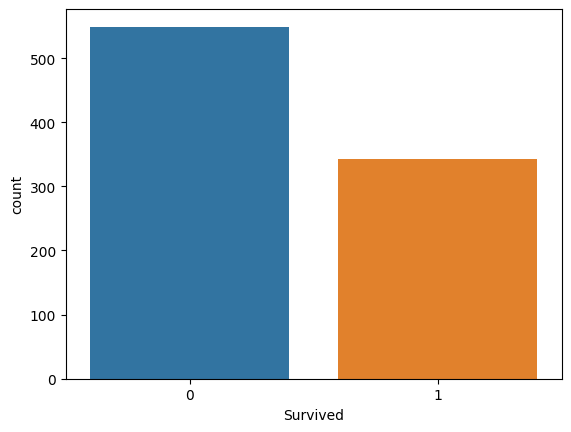

In [230]:
sns.countplot(x="Survived", data=df)

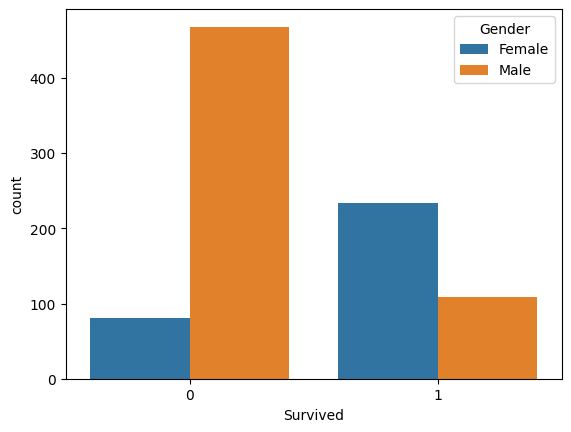

In [231]:
sns.countplot(x="Survived", data=df, hue="male")
plt.legend(title="Gender", labels=["Female", "Male"])
plt.show()

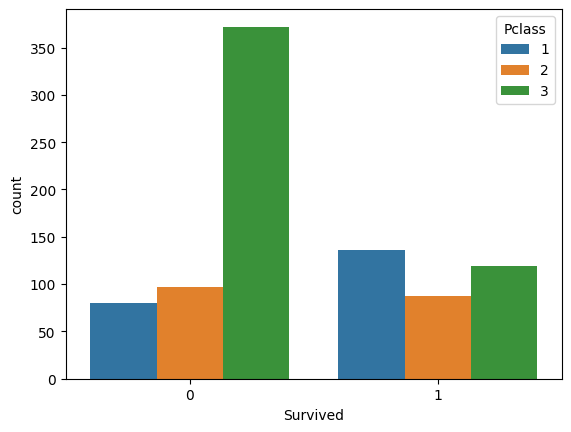

In [232]:
sns.countplot(x="Survived", data=df, hue="Pclass")
plt.show()

<Axes: >

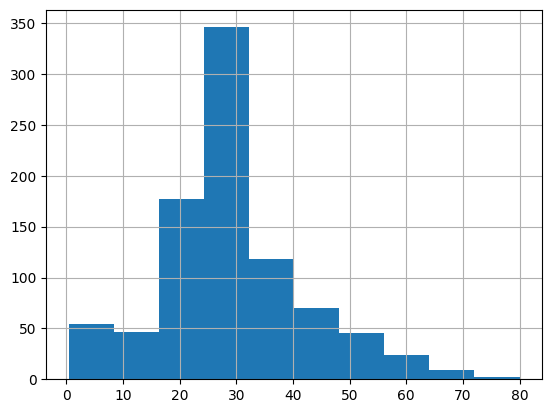

In [233]:
df.Age.hist()

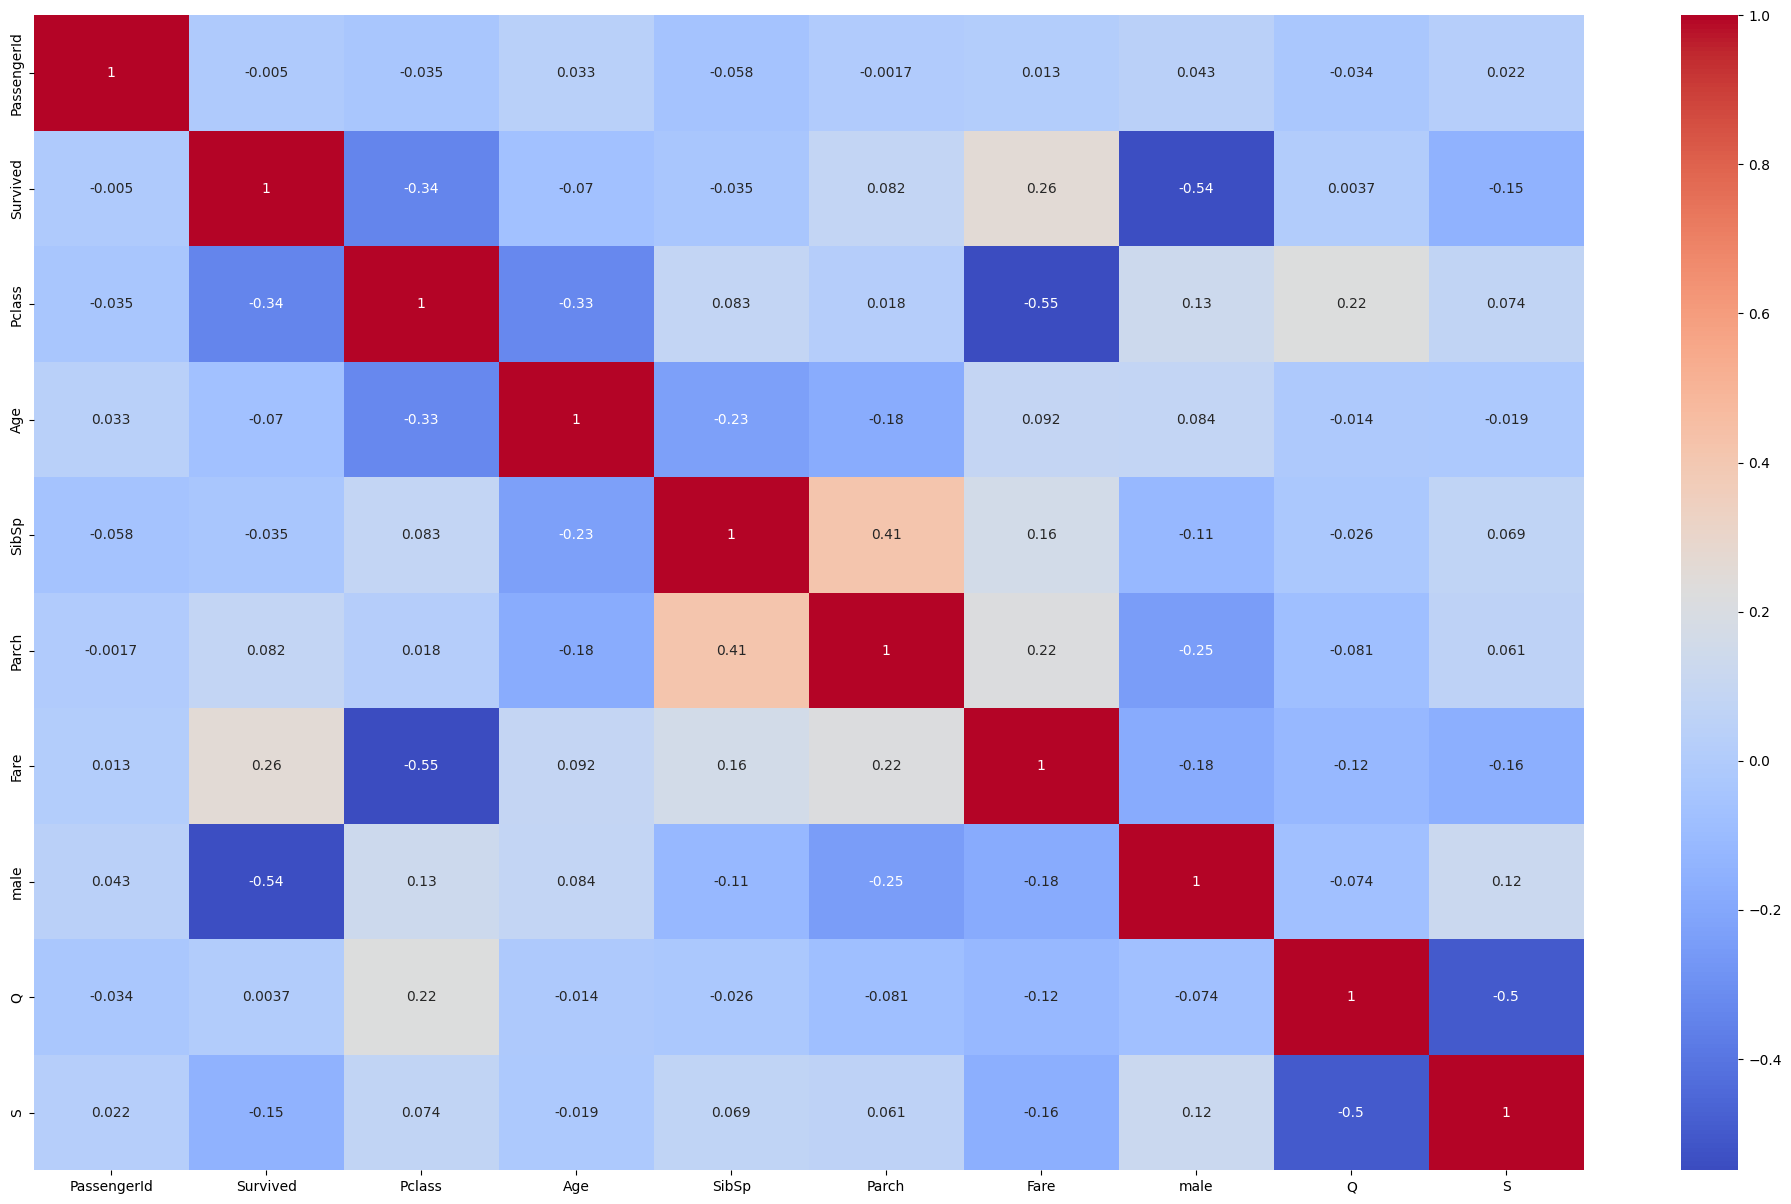

In [234]:
 plt.figure(figsize=(25, 15))
 correlation_matrix = df.corr()
 heatmap =sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
 plt.show()

<Axes: title={'center': 'Correlation with target'}>

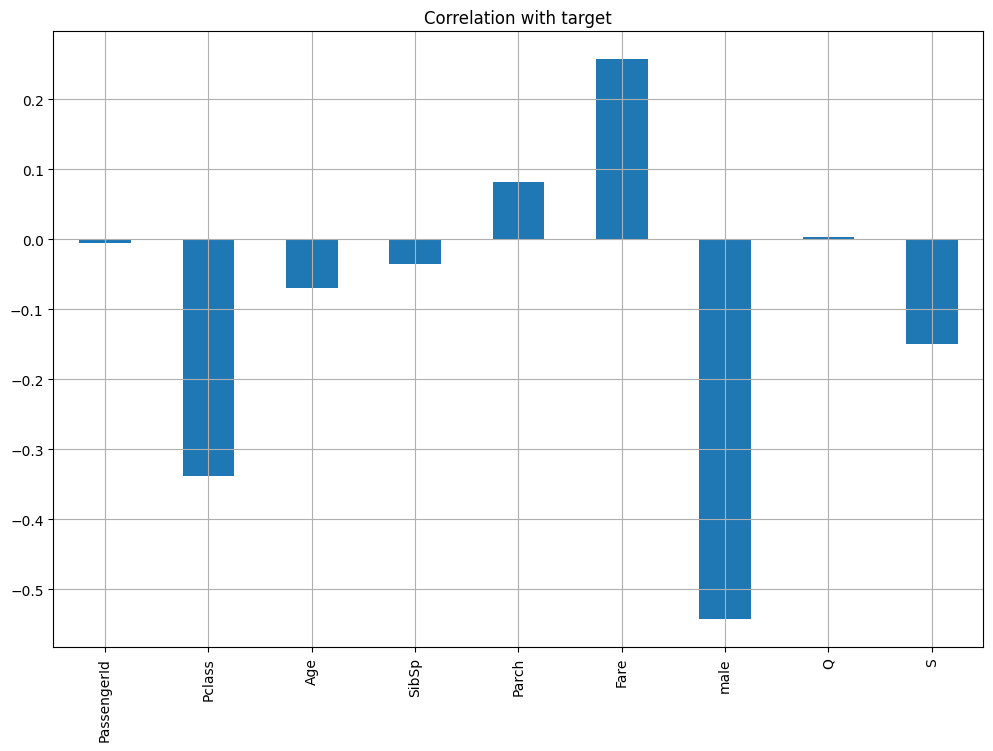

In [235]:
df.drop("Survived", axis=1).corrwith(df["Survived"]).plot(kind="bar", grid=True, figsize=(12, 8), title="Correlation with target")

In [236]:
df.drop(["PassengerId", "Q"],axis=1, inplace=True)

In [237]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,S
0,0,3,22.0,1,0,7.2500,True,True
1,1,1,38.0,1,0,71.2833,False,False
2,1,3,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,True
4,0,3,35.0,0,0,8.0500,True,True


<Axes: >

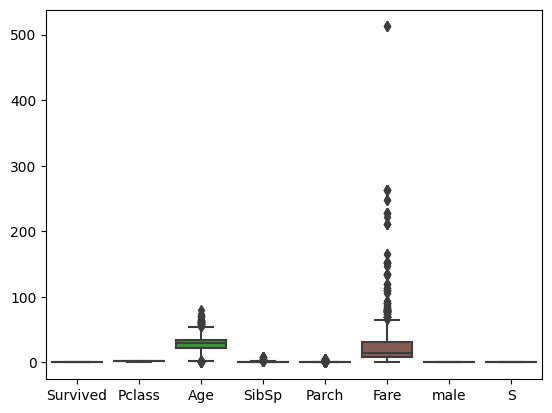

In [238]:
sns.boxplot(df)

<Axes: >

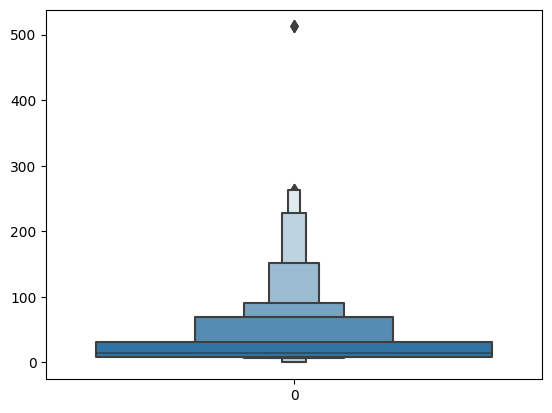

In [239]:
sns.boxenplot(df["Fare"])

In [240]:
le = LabelEncoder()
df['male'] = le.fit_transform(df['male'])
df['S'] = le.fit_transform(df['S'])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,S
0,0,3,22.0,1,0,7.2500,1,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,0,3,35.0,0,0,8.0500,1,1


In [241]:
sc = MinMaxScaler()
df["Fare"] = sc.fit_transform(df["Fare"].values.reshape(-1, 1))
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,S
0,0,3,22.0,1,0,0.014151,1,1
1,1,1,38.0,1,0,0.139136,0,0
2,1,3,26.0,0,0,0.015469,0,1
3,1,1,35.0,1,0,0.103644,0,1
4,0,3,35.0,0,0,0.015713,1,1


In [242]:
MM = MinMaxScaler()

scaled_data = df.copy()
float_columns = scaled_data.select_dtypes(include=['float64']).columns

scaled_data[float_columns] = MM.fit_transform(scaled_data[float_columns])

In [243]:
df = scaled_data
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,S
0,0,3,0.271174,1,0,0.014151,1,1
1,1,1,0.472229,1,0,0.139136,0,0
2,1,3,0.321438,0,0,0.015469,0,1
3,1,1,0.434531,1,0,0.103644,0,1
4,0,3,0.434531,0,0,0.015713,1,1


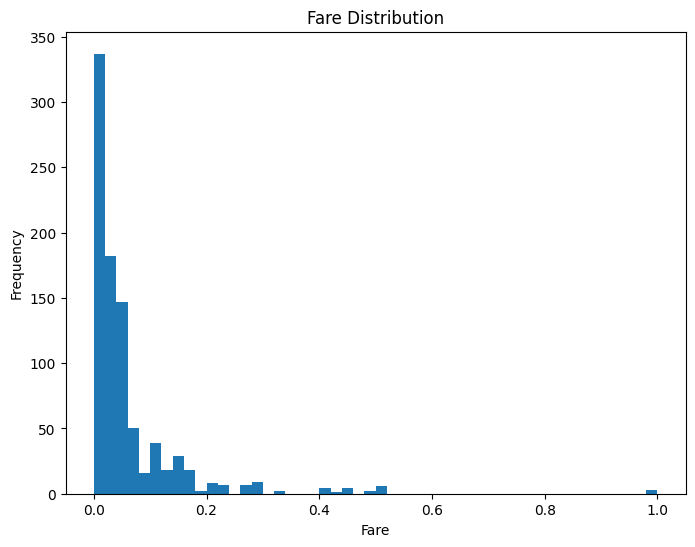

In [244]:
plt.figure(figsize=(8,6))
plt.hist(df['Fare'], bins = 50)
plt.title("Fare Distribution")
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [245]:
num_data=[]
for i in df.columns:
    if df[i].dtype==float :
        num_data.append(i)
print(num_data)

['Age', 'Fare']


In [246]:
Z_score= zscore(df[num_data])
Z_score

,Age,Fare
0,-5.924806e-01,-0.502445
1,6.387890e-01,0.786845
2,-2.846632e-01,-0.488854
3,4.079260e-01,0.420730
4,4.079260e-01,-0.486337
...,...,...
886,-2.077088e-01,-0.386671
887,-8.233437e-01,-0.044381
888,-3.399518e-16,-0.176263
889,-2.846632e-01,-0.044381


In [247]:
no_outliers = ((Z_score > -3.0) & (Z_score < 3.0)).all(axis=1)
no_outliers

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Length: 891, dtype: bool

In [248]:
x = df.drop("Survived", axis=1)
y = df["Survived"]

In [249]:
rus = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(x, y)

In [250]:
df = pd.concat([X_resampled, y_resampled], axis="columns")
df.head()

,Pclass,Age,SibSp,Parch,Fare,male,S,Survived
0,3,0.271174,1,0,0.014151,1,1,0
1,1,0.472229,1,0,0.139136,0,0,1
2,3,0.321438,0,0,0.015469,0,1,1
3,1,0.434531,1,0,0.103644,0,1,1
4,3,0.434531,0,0,0.015713,1,1,0


In [251]:
df.shape

(1098, 8)

In [252]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

In [253]:
clf = LogisticRegression().fit(x_train, y_train)
predictions = clf.predict(x_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       444
           1       0.77      0.69      0.73       268

    accuracy                           0.80       712
   macro avg       0.80      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



In [254]:
model = LogisticRegression()
model = model.fit(x_train, y_train)
test_pred = model.predict(x_train)
test_acc = accuracy_score(y_train, test_pred)
test_acc*100

80.47752808988764

In [255]:
valid_pred = model.predict(x_valid)
valid_acc = accuracy_score(y_valid, valid_pred)
valid_acc*100

80.89887640449437

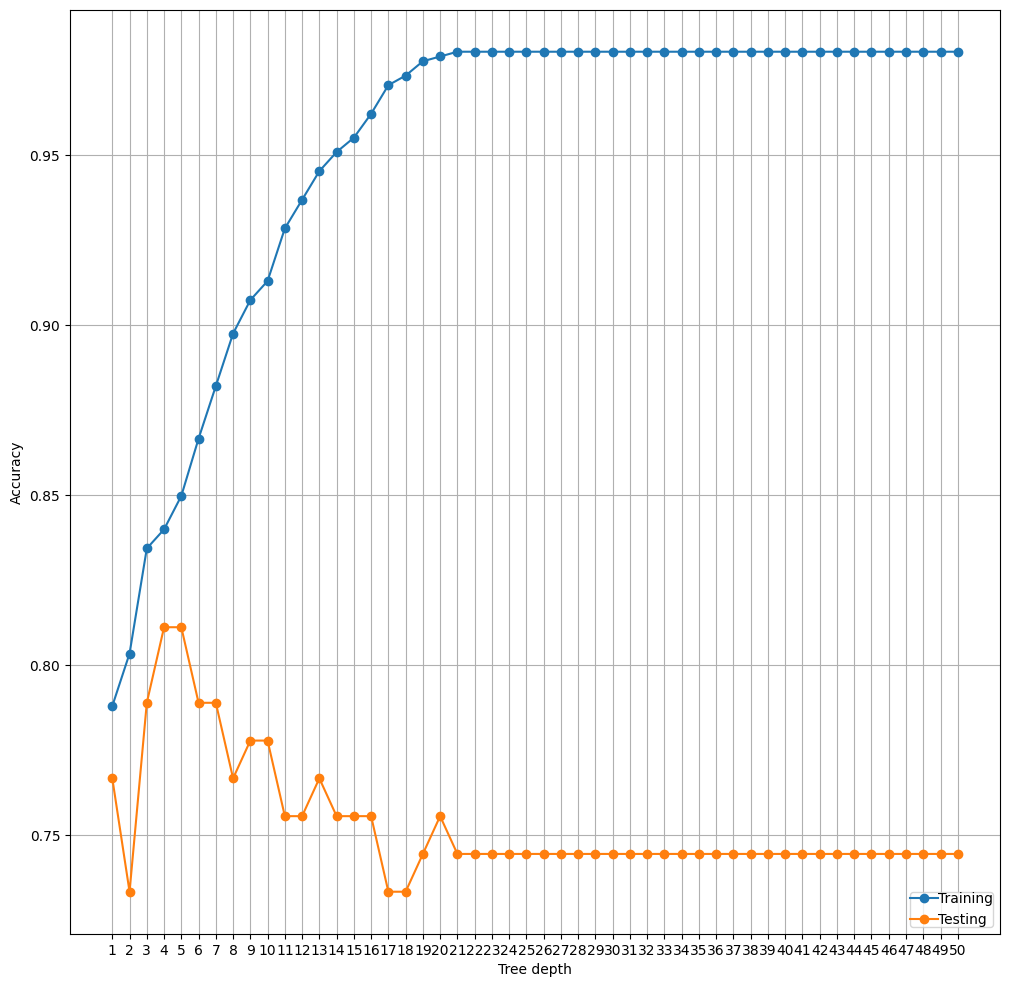

In [256]:
max_depth = np.linspace(1, 50, 50, dtype='int64')
accuracy_train, accuracy_test = [], []

for i in max_depth:
    clf_dt = tree.DecisionTreeClassifier(max_depth=i, random_state=12345)
    clf_dt.fit(x_train, y_train)
    y_train_pred = clf_dt.predict(x_train)
    y_test_pred = clf_dt.predict(x_test)
    
    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
    accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))
fig, ax = plt.subplots(figsize=(12, 12))
plt.plot(max_depth, accuracy_train, label='Training', marker='o')
plt.plot(max_depth, accuracy_test, label='Testing', marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.legend(loc='lower right', borderpad=0, handletextpad=0) 

plt.xticks(max_depth)
plt.grid(True)

plt.show()

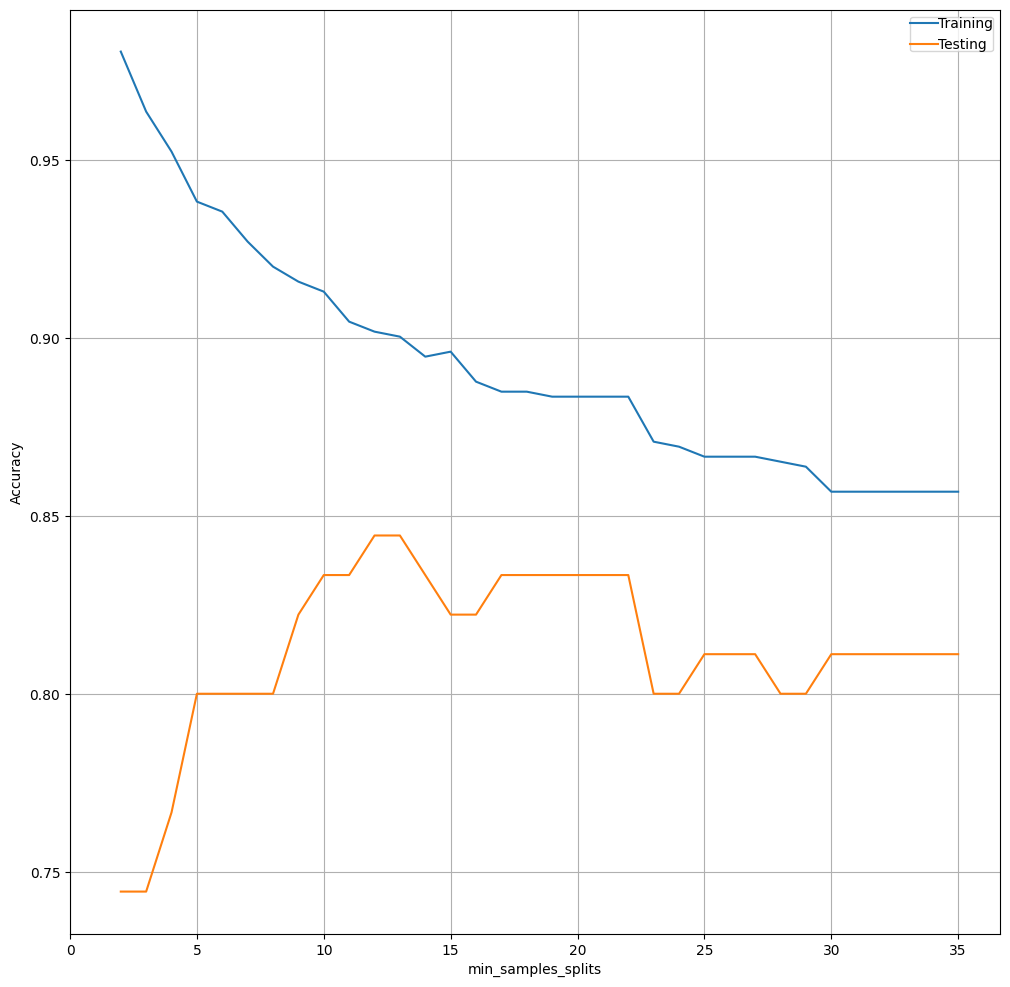

In [257]:
min_samples_split = np.linspace(2, 35, 35,dtype='int64')
accuracy_train,accuracy_test=[],[]

for i in min_samples_split:
    clf_dt=tree.DecisionTreeClassifier(min_samples_split=i, random_state=12345)
    clf_dt.fit(x_train,y_train)
    y_train_pred = clf_dt.predict(x_train)
    y_test_pred = clf_dt.predict(x_test)
    
    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
    accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

ax= plt.figure(figsize=(12, 12))
plt.plot(min_samples_split,accuracy_train)
plt.plot(min_samples_split,accuracy_test)
plt.ylabel('Accuracy')
plt.xlabel('min_samples_splits')
plt.legend(['Training', 'Testing'],loc='upper right', borderpad=0, handletextpad=0) 

plt.xticks(np.arange(0.0, 40.0, 5))
plt.grid(True)

plt.show()

In [258]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
test_pred = model.predict(x_train)
test_acc = accuracy_score(y_train, test_pred)
print(test_acc)

0.9803370786516854


In [259]:
valid_pred = model.predict(x_valid)
valid_acc = accuracy_score(y_valid, valid_pred)
valid_acc


0.8202247191011236

In [260]:
final_pred = model.predict(x_test)
final_acc = accuracy_score(y_test, final_pred)
final_acc

0.7444444444444445

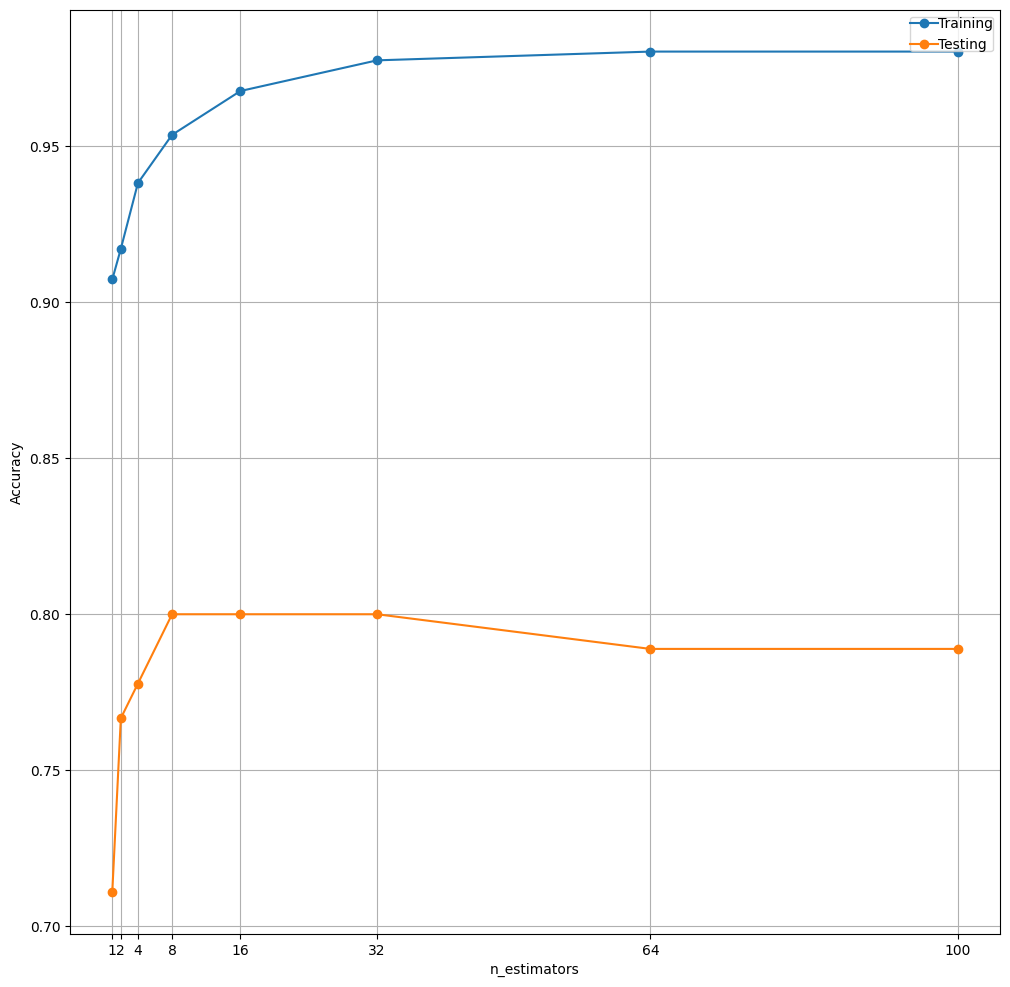

In [261]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
accuracy_train, accuracy_test = [], []

for i in n_estimators:
    clf_rf = RandomForestClassifier(n_estimators=i, random_state=12345)
    clf_rf.fit(x_train, y_train)
    y_train_pred = clf_rf.predict(x_train)
    y_test_pred = clf_rf.predict(x_test)

    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
    accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(12, 12))
plt.plot(n_estimators, accuracy_train, marker='o')
plt.plot(n_estimators, accuracy_test, marker='o')
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.legend(['Training', 'Testing'], loc='upper right', borderpad=0, handletextpad=0)

plt.xticks(n_estimators)
plt.grid(True)
plt.show()

In [262]:
model2 = RandomForestClassifier(n_estimators=8, max_depth=100)
model2.fit(x_train, y_train)
test_pred = model2.predict(x_train)
test_acc = accuracy_score(y_train, test_pred)
test_acc

0.9564606741573034

In [263]:
valid_pred = model2.predict(x_valid)
valid_acc = accuracy_score(y_valid, valid_pred)
valid_acc

0.8426966292134831

In [264]:
final_pred = model.predict(x_test)
final_acc = accuracy_score(y_test, final_pred)
final_acc

0.7444444444444445

In [265]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
18/18 [==============================] - 1s 7ms/step - loss: 0.6428 - accuracy: 0.6011 - val_loss: 0.5755 - val_accuracy: 0.6503
Epoch 2/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.6309 - val_loss: 0.5378 - val_accuracy: 0.7133
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.6995 - val_loss: 0.5069 - val_accuracy: 0.7692
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7715 - val_loss: 0.4790 - val_accuracy: 0.7832
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7575 - val_loss: 0.4675 - val_accuracy: 0.8252
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.7944 - val_loss: 0.4546 - val_accuracy: 0.8182
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.7926 - val_loss: 0.4396 - val_accuracy: 0.8252
Epoch 8/50
18/18 [==

In [266]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


3/3 [==============================] - 0s 512us/step - loss: 0.4660 - accuracy: 0.8000
Test Accuracy: 0.80


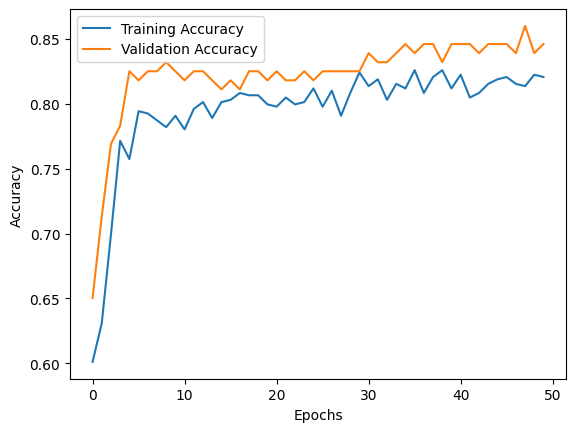

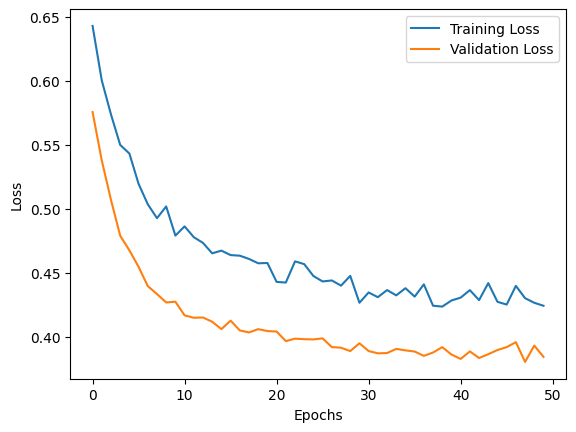

In [267]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
